사전에 어떤 과일이 들어있는지 모르는 상황에서는 **k-평균(k-means)** 군집 알고리즘을 사용할 수 있다. 이 k-평균 알고리즘이 각 군집의 평균값을 자동으로 찾아주는데, 이 평균값이 군집의 중심에 위치하기 때문에 **클러스터 중심(cluster center)** 혹은 **센트로이드(centroid)**라고 부른다

## k-평균 알고리즘 소개
1. 무작위로 k개의 클러스터 중심을 정한다
2. 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정한다
3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심을 변경한다
4. 클러스터 중심에 변화가 없을 때까지 2번으로 돌아가 반복한다

풀어 설명하면 다음과 같다. 설명하기 전 k는 3으로 가정한다. 3개의 클러스터 중심을 랜덤하게 지정한다. 그리고 클러스터 중심에서 가장 가까운 샘플을 하나의 클러스터로 묶는다. 그 다음 클러스터의 중심을 다시 계산하여 이동시킨다. 클러스터의 중심을 이동시킨 후 또 가장 가까운 샘플을 클러스터로 묶는다. 이것을 계속 반복하여 클러스터의 중심이 바뀌지 않으면 알고리즘을 종료한다

In [3]:
# 셸 명령어를 이용하여 데이터 다운로드
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100 * 100)

# k-means
from sklearn.cluster import KMeans

# n_clusters: 클러스터의 개수 지정
km = KMeans(n_clusters=3, random_state=42)

# 비지도 학습이므로 타깃 데이터가 없음
km.fit(fruits_2d)

# 군집된 결과는 KMeans의 labels_ 속성에 저장됨
# 군집의 개수는 3으로 지정했으므로 labels_의 값은 0 or 1 or 2
print(km.labels_)

# 군집 별 분류된 샘플의 개수
print(np.unique(km.labels_, return_counts=True))

--2021-12-12 13:38:10--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-12-12 13:38:10--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-12-12 13:38:10--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [4]:
# 이미지 출력할 유틸리티 함수
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    # 샘플의 개수
    n = len(arr)

    # 한 줄에 10개씩
    rows = int(np.ceil(n / 10))
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio),
                            squeeze=False)
    for i in range(rows):
        for u in range(cols):
            if i * 10 + u < n:
                axs[i, u].imshow(arr[i * 10 + u], cmap='gray_r')
            axs[i, u].axis('off')
    plt.show()

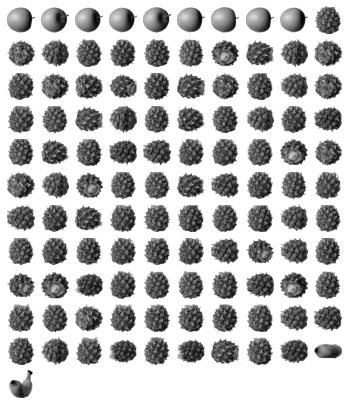

In [8]:
draw_fruits(fruits[km.labels_==0], ratio=0.6)

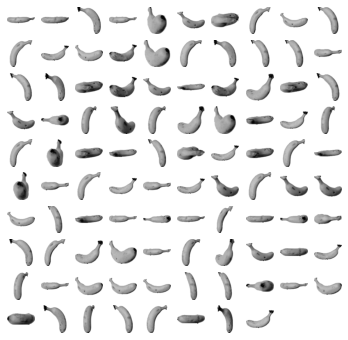

In [9]:
draw_fruits(fruits[km.labels_==1], ratio=0.6)

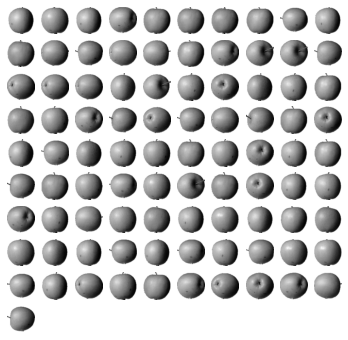

In [10]:
draw_fruits(fruits[km.labels_==2], ratio=0.6)

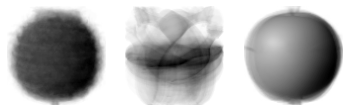

In [11]:
# cluster_centers_: KMeans 클래스가 최종적으로 찾은 클러스터 중심
#                   fruits_2d 샘플의 중심이므로 이미지로 출력하려면
#                   100 * 100으로 reshape 해줘야 함
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=2)

In [13]:
# transform(): 훈련 데이터 샘플에서 클러스터 중심까지 거리로 변환
print(km.transform(fruits_2d[100:101]))

# [100]이 아닌 슬라이싱으로 전달하는 이유: [100] -> (10000,) shape를 가짐
#                                          슬라이싱 -> (1, 10000) shape를 가짐

[[3393.8136117  8837.37750892 5267.70439881]]


In [14]:
# predict(): 가장 가까운 클러스터 중심을 예측 클래스로 출력
print(km.predict(fruits_2d[100:101]))

[0]


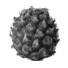

In [15]:
draw_fruits(fruits[100:101])

In [16]:
# n_iter_: k-평균 알고리즘의 반복 횟수
print(km.n_iter_)

4


## 최적의 k 찾기
우리는 미리 데이터가 3가지의 과일로 되어있는 것을 알고 k를 3으로 지정했다. 그러면 아무것도 모른 채 최적의 k를 찾으려면 어떻게 해야할까? 이에 대한 방법 중 대표적인 방법으로 **엘보우(elbow)**가 있다

k-평균 알고리즘에서 클러스터 중심과 클러스터에 속한 샘플 사이의 거리를 잴 수 있었는데, 이 거리의 제곱 합을 **이너셔(inertia)**라고 한다. 일반적으로 클러스터 개수가 늘어나면 각 클러스터의 크기가 줄어드므로 이너셔도 줄어든다. 엘보우 알고리즘은 클러스터 개수를 늘려가면서 이너셔의 변화를 관찰해 최적의 클러스터 개수를 찾는 방법이다. 클러스터를 늘려가며 이너셔를 그래프로 그리면 감소하는 속도가 꺾이는 지점이 있다. 이후 부터는 클러스터 개수를 늘려도 클러스터에 잘 밀집된 정도가 크게 개선되지 않기 때문에 이 지점을 최적의 k로 볼 수 있다. KMeans 클래스의 inertia_ 속성을 이용하면 된다

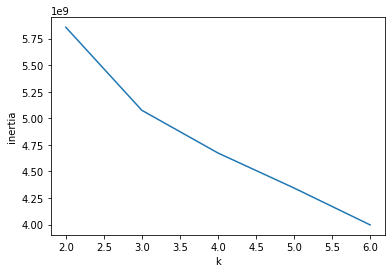

In [17]:
inertia = []

# k를 2에서 6까지 바꾸어봄
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()